In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import datasets,layers,models

In [4]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [5]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
import matplotlib.pyplot as plt

In [6]:
def plot_sample(x,y,index):
    plt.figure(figsize=(14,2))
    plt.imshow(x[index])
    plt.xlabel(y[index])

C:\Users\dwany\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


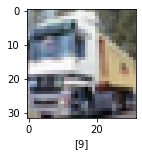

In [7]:
plot_sample(x_train,y_train,1)

In [8]:
x_train=x_train/255
x_test=x_test/255
#normalize

In [9]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])#sequnetial(pipline)

In [10]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 23s 14ms/step - loss: 1.4976 - accuracy: 0.4602
Epoch 2/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1747 - accuracy: 0.5887
Epoch 3/5
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0645 - accuracy: 0.6284
Epoch 4/5
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9880 - accuracy: 0.6532
Epoch 5/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9318 - accuracy: 0.6740


In [12]:
y_pred=cnn.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [13]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9615 - accuracy: 0.6704


[0.9615025520324707, 0.6704000234603882]

In [16]:
import numpy as np
from sklearn.metrics import classification_report
y_classes=[np.argmax(element) for element in y_pred]
#y_classes
# y_test
print('classification report ',classification_report(y_test,y_classes))


classification report                precision    recall  f1-score   support

           0       0.72      0.70      0.71      1000
           1       0.83      0.77      0.80      1000
           2       0.52      0.53      0.53      1000
           3       0.50      0.47      0.48      1000
           4       0.63      0.57      0.60      1000
           5       0.55      0.64      0.59      1000
           6       0.73      0.76      0.74      1000
           7       0.73      0.72      0.72      1000
           8       0.78      0.75      0.77      1000
           9       0.73      0.79      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

